## Perform pair correlation on STORM data ##  


In [1]:
import os
import pandas as pd
import numpy
import storm_analysis.sa_utilities.hdf5_to_txt as hdf5ToTxt

# Change directory
os.chdir("/home/gayatri/storm/exp-1/slide-4")
h5 = "movie_0002_daostorm.hdf5"

### Step 1 ###  
Read .hdf5 file into a pandas dataframe. 

In [15]:
movie_name = h5.rsplit('.hdf5',1)[0][:]
hdf5ToTxt.hdf5ToTxt(h5, movie_name + '.csv')

Converting tracks.


In [16]:
df = pd.read_csv(movie_name + '.csv')

In [17]:
df.head()

,index,background,category,error,frame_number,height,iterations,significance,sum,track_id,track_length,x,xsigma,y,z
0,0,34.296,0,83.220,4,73.371,9,23.614,455.493,0.0,1,140.013,1.0,83.044,0.0
1,1,50.217,0,182.523,5,139.353,17,53.737,870.169,1.0,2,135.367,2.0,163.306,0.0
2,2,26.655,0,57.564,44,62.033,8,22.006,382.634,2.0,1,122.776,1.0,98.019,0.0
3,3,19.106,0,42.527,46,60.411,9,24.559,376.164,3.0,1,96.053,1.0,29.226,0.0
4,4,27.980,1,61.791,51,53.996,9,18.107,336.029,5.0,1,122.981,1.0,97.310,0.0


In [28]:
a = 160 # pixel dimension
df['s_2'] = df['xsigma']*a*df['xsigma']*a
df['sigma_s_2'] = df['s_2'] + (a**2)/12
# df.head()

In [29]:
df['sigma_xy_2'] = (df['sigma_s_2']/df['sum']) * ((16/9) + (8*numpy.pi*df['sigma_s_2']*(df['background']**2))/(df['sum']*a**2))
df['thompson'] = (df['sigma_s_2']/df['sum']) + (8*numpy.pi*df['sigma_s_2']*df['sigma_s_2']*(df['background']**2)/((df['sum']**2)*(a**2)))
df['shot_noise'] = df['s_2']/df['sum']

In [30]:
df.describe()

,index,background,category,error,frame_number,height,iterations,significance,sum,track_id,track_length,x,xsigma,y,z,s_2,sigma_s_2,sigma_xy_2,thompson,shot_noise
count,8633.00000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.00000,8633.000000,8633.000000,8633.000000,8633.000000,8633.0,8.633000e+03,8.633000e+03,8.633000e+03,8.633000e+03,8633.000000
mean,4316.00000,62.193740,0.578941,166.772019,13239.815591,170.213008,21.825090,60.496741,1059.571713,4316.00000,2.420595,157.280262,2.420595,135.232806,0.0,4.232081e+05,4.253414e+05,1.531523e+07,1.531511e+07,148.997823
std,2492.27677,87.345553,0.811786,273.038943,8913.539389,290.040022,30.243505,99.568137,1806.742537,2492.27677,3.267035,51.583787,3.267035,46.233473,0.0,2.700435e+06,2.700435e+06,3.746329e+08,3.746328e+08,176.891929
min,0.00000,-12.238000,0.000000,20.490000,4.000000,39.511000,5.000000,18.003000,245.927000,0.00000,1.000000,2.326000,1.000000,11.858000,0.0,2.560000e+04,2.773333e+04,4.960762e+00,2.793965e+00,2.571583
25%,2158.00000,24.386000,0.000000,61.527000,4941.000000,58.346000,9.000000,20.879000,363.045000,2158.00000,1.000000,128.527000,1.000000,89.220000,0.0,2.560000e+04,2.773333e+04,3.274053e+03,3.219037e+03,67.403897
50%,4316.00000,29.942000,0.000000,87.144000,12772.000000,72.823000,10.000000,26.652000,453.490000,4316.00000,1.000000,134.898000,1.000000,155.604000,0.0,2.560000e+04,2.773333e+04,5.009610e+03,4.950979e+03,78.365588
75%,6474.00000,61.988000,1.000000,170.268000,20571.000000,170.198000,23.000000,60.885000,1059.920000,6474.00000,2.000000,220.515000,2.000000,163.087000,0.0,1.024000e+05,1.045333e+05,7.335685e+04,7.324629e+04,151.322707
max,8632.00000,2192.244000,2.000000,6936.399000,29991.000000,10329.109000,697.000000,3450.920000,64460.858000,8632.00000,78.000000,251.439000,78.000000,251.733000,0.0,1.557504e+08,1.557525e+08,2.754583e+10,2.754583e+10,3298.642557


In [31]:
df['sigma_xy'] = numpy.sqrt(df['sigma_xy_2'])
df['th_root'] = numpy.sqrt(df['thompson'])
df['shot_root'] = numpy.sqrt(df['shot_noise'])

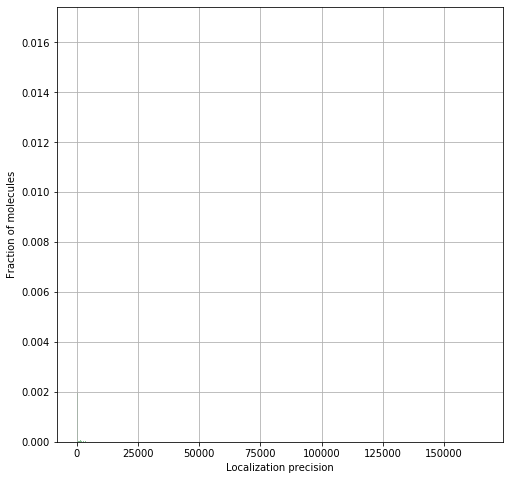

In [32]:
import matplotlib.pyplot as plt

hist = df['th_root'].hist(bins='auto', figsize = (8,8), color='#86bf91', density = True)
plt.ylabel('Fraction of molecules')
plt.xlabel('Localization precision')
plt.savefig(movie_name + '_sigma_xy')

In [33]:
bins_hist = numpy.histogram_bin_edges(df['th_root'], bins='auto')

In [34]:
print(bins_hist)

[1.67151586e+00 2.25243465e+01 4.33771771e+01 ... 1.65927645e+05
 1.65948497e+05 1.65969350e+05]


In [35]:
hist, bin_edges = numpy.histogram(df['th_root'], bins = bins_hist, density=True)
# plt.figure(figsize=(8, 8))
print(bin_edges.size)
bin_centers = numpy.empty((0))
print(bin_centers.size)
for i in range(len(bin_edges)-1):
    d = (bin_edges[i] + bin_edges[i+1])/2
    bin_centers = numpy.append(bin_centers, numpy.array([d]), axis=0)
print(bin_centers.size)



7960
0
7959


[0.02 58.60 12.84]


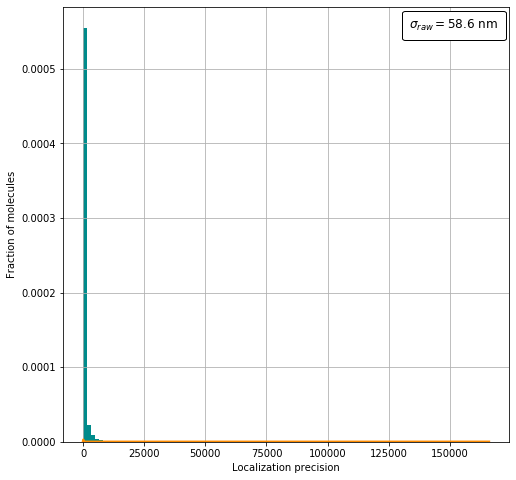

In [36]:
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText

def fit_function(x, B, mu, sigma):
    return (B * numpy.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

popt, pcov = curve_fit(fit_function, xdata=bin_centers, ydata=hist, p0=[1.0, 50.0, 50])

float_formatter = "{:.2f}".format
numpy.set_printoptions(formatter={'float_kind':float_formatter})
print(popt)
fig, ax = plt.subplots(figsize = (8,8))
x_new = numpy.linspace(df['th_root'].min(),df['th_root'].max(), num=1500)
p_Hist = df['th_root'].hist(bins=100, color='darkcyan', density = True)
plt.plot(x_new, fit_function(x_new, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')
at = AnchoredText(r'$\sigma_{raw} = $' + str(numpy.around(popt[1],2)) + " nm",
                loc='upper right', prop=dict(size=12), frameon=True,
                )
at.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")
ax.add_artist(at)
plt.ylabel('Fraction of molecules')
plt.xlabel('Localization precision')

plt.savefig(movie_name + '_thompson_formula')
plt.show()



In [37]:
df.describe()

,index,background,category,error,frame_number,height,iterations,significance,sum,track_id,...,y,z,s_2,sigma_s_2,sigma_xy_2,thompson,shot_noise,sigma_xy,th_root,shot_root
count,8633.00000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.00000,...,8633.000000,8633.0,8.633000e+03,8.633000e+03,8.633000e+03,8.633000e+03,8633.000000,8633.000000,8633.000000,8633.000000
mean,4316.00000,62.193740,0.578941,166.772019,13239.815591,170.213008,21.825090,60.496741,1059.571713,4316.00000,...,135.232806,0.0,4.232081e+05,4.253414e+05,1.531523e+07,1.531511e+07,148.997823,741.168555,740.809560,11.164829
std,2492.27677,87.345553,0.811786,273.038943,8913.539389,290.040022,30.243505,99.568137,1806.742537,2492.27677,...,46.233473,0.0,2.700435e+06,2.700435e+06,3.746329e+08,3.746328e+08,176.891929,3842.864624,3842.918369,4.934292
min,0.00000,-12.238000,0.000000,20.490000,4.000000,39.511000,5.000000,18.003000,245.927000,0.00000,...,11.858000,0.0,2.560000e+04,2.773333e+04,4.960762e+00,2.793965e+00,2.571583,2.227277,1.671516,1.603616
25%,2158.00000,24.386000,0.000000,61.527000,4941.000000,58.346000,9.000000,20.879000,363.045000,2158.00000,...,89.220000,0.0,2.560000e+04,2.773333e+04,3.274053e+03,3.219037e+03,67.403897,57.219338,56.736562,8.209988
50%,4316.00000,29.942000,0.000000,87.144000,12772.000000,72.823000,10.000000,26.652000,453.490000,4316.00000,...,155.604000,0.0,2.560000e+04,2.773333e+04,5.009610e+03,4.950979e+03,78.365588,70.778601,70.363195,8.852434
75%,6474.00000,61.988000,1.000000,170.268000,20571.000000,170.198000,23.000000,60.885000,1059.920000,6474.00000,...,163.087000,0.0,1.024000e+05,1.045333e+05,7.335685e+04,7.324629e+04,151.322707,270.844704,270.640526,12.301329
max,8632.00000,2192.244000,2.000000,6936.399000,29991.000000,10329.109000,697.000000,3450.920000,64460.858000,8632.00000,...,251.733000,0.0,1.557504e+08,1.557525e+08,2.754583e+10,2.754583e+10,3298.642557,165969.355896,165969.350235,57.433810
